# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [89]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\afsan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [14]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape

df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)

(11314, 4)


In [15]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [16]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64


In [17]:
# Inspect / remove duplicates
print(df.duplicated().sum())

0


In [18]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [19]:
# 1. Make a function that makes all text lowercase.
def lowercase(a_string):
    return a_string.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
lowercase(test_string)


'this is a sentence with lots of caps.'

In [20]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(a_string):
    a_string = re.sub(r'[^\w\s]', '',a_string)
    return a_string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [21]:
# 3. Make a function that removes all stopwords.


def remove_stopwords(a_string):
    
    #creates a list of words
    words = word_tokenize(a_string)
    
    # list for valid words
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [9]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

def stem_words(a_string):
    
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        stemmed_word = porter.stem(word)
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

test_string = 'I played and started playing with players and we all love to play with plays'
stem_words(test_string)


'i play and start play with player and we all love to play with play'

In [25]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(input_string):
    input_string = lowercase(input_string)
    input_string = remove_punctuation(input_string)
    input_string = remove_stopwords(input_string) 
    input_string = stem_words(input_string)
    
    return input_string

test_string = 'I played and started playing with players and we all love to play with plays'
text_pipeline(test_string)

'play start play player love play play'

In [36]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

#df['message_clean'] = df['message']
df['message_clean'] = df['message'].apply(text_pipeline)

print("ORIGINAL TEXT:", df['message'][0])
print("CLEANDED TEXT:", df['message_clean'][0])

ORIGINAL TEXT: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





CLEANDED TEXT: lerxstwamumdedu where thing subject car nntppostinghost rac3wamumdedu organ univers maryland colleg park line 15 wonder anyon could enlighten car saw day 2door sport car look late 60 earli 70 call bricklin door realli small addit front bumper separ

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [26]:
df.head()

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,From: lerxst@wam.umd.edu (where's my thing)\r\...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,From: jgreen@amber (Joe Green)\r\nSubject: Re:...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


In [27]:
# 1. Define your `X` and `y` data. 

X = df['message_clean'].values

y = df['topic_category'].values

In [28]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()


In [30]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X)

TfidfVectorizer()

In [31]:
# 4. Transform your X data using your fitted vectorizer. 

X = vectorizer.transform(X)


In [35]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X.shape, type(X))

features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print('Total features:', len(features))

df_idf = pd.DataFrame.from_dict( {'feature': features, 'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf

(11314, 130107) <class 'scipy.sparse.csr.csr_matrix'>
Total feature: 130107


,feature,idf
46783,deum,9.640737
108486,sniders,9.640737
108482,snick,9.640737
58639,genitalia,9.640737
58638,geniscript,9.640737
...,...,...
114455,the,1.069056
90379,organization,1.040307
76032,lines,1.003275
111322,subject,1.000000


# Split your data into Training and Testing data. 

In [37]:
# Split our data into testing and training like always. 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [38]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha=.05)


In [39]:
# Fit our model with our training data.

model.fit(X_train, y_train)


MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [43]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)


In [ ]:
# 2. Print the accuracy of the model. 
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

C:\Users\afsan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


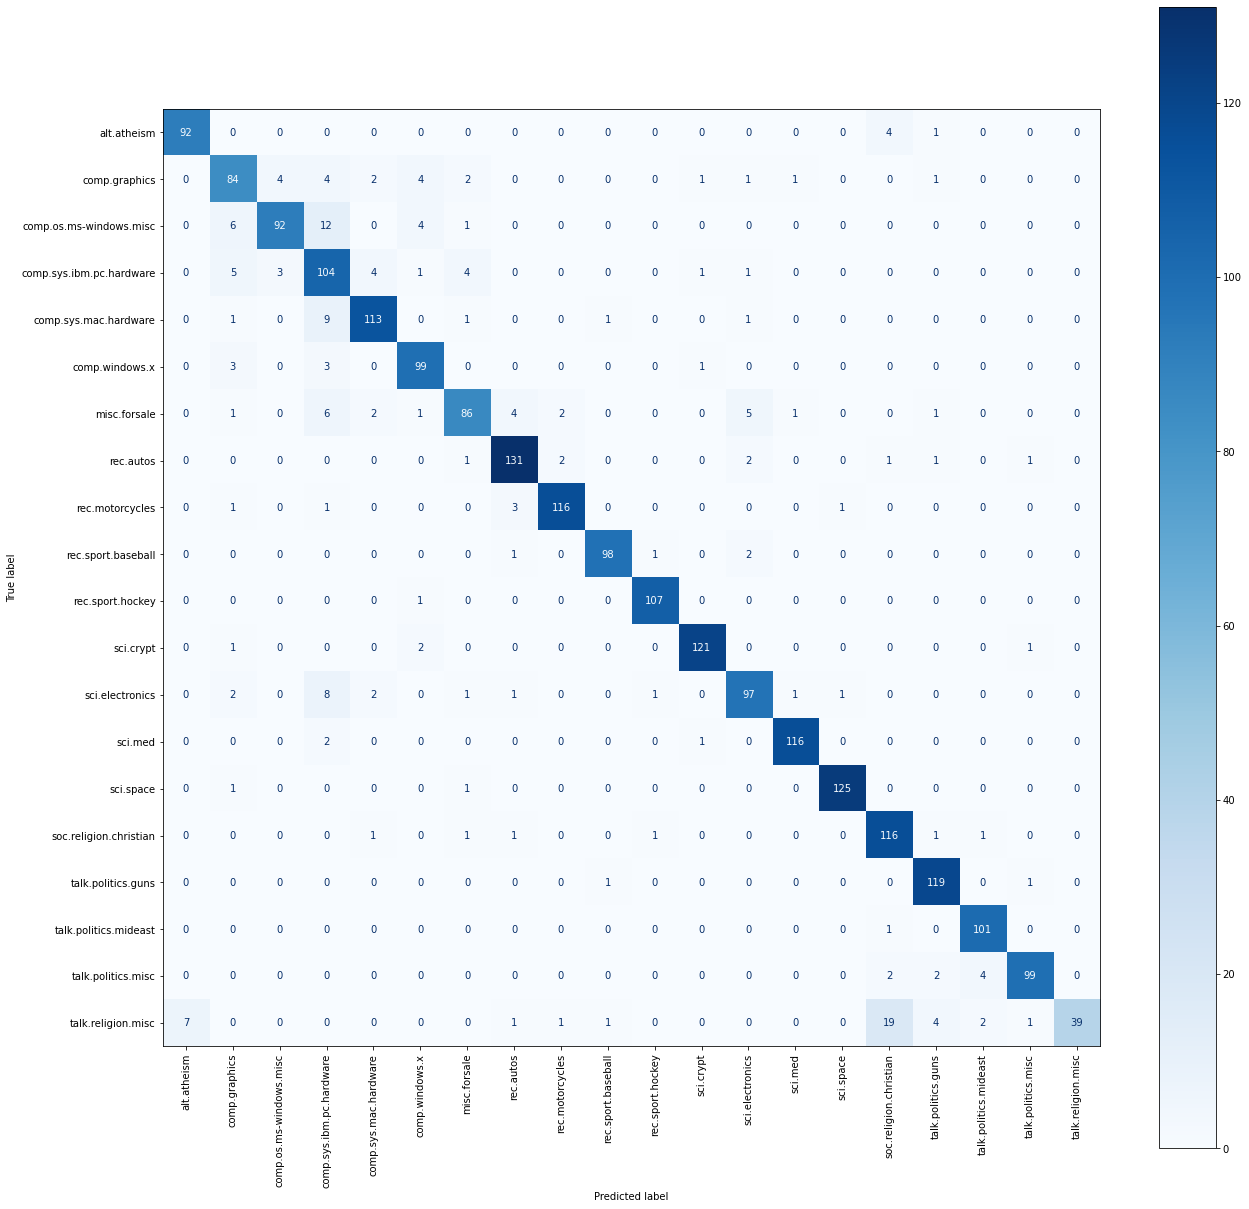

In [41]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [44]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.93      0.95      0.94        97
           comp.graphics       0.80      0.81      0.80       104
 comp.os.ms-windows.misc       0.93      0.80      0.86       115
comp.sys.ibm.pc.hardware       0.70      0.85      0.76       123
   comp.sys.mac.hardware       0.91      0.90      0.90       126
          comp.windows.x       0.88      0.93      0.91       106
            misc.forsale       0.88      0.79      0.83       109
               rec.autos       0.92      0.94      0.93       139
         rec.motorcycles       0.96      0.95      0.95       122
      rec.sport.baseball       0.97      0.96      0.97       102
        rec.sport.hockey       0.97      0.99      0.98       108
               sci.crypt       0.97      0.97      0.97       125
         sci.electronics       0.89      0.85      0.87       114
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [52]:
my_sentence = 'We should have more strict gun laws, and not anyone can own a gun'\
                +'to buy a gun states should mandate tests to determine a persons mental'\
                + 'and physical state'

# 1. Apply the text pipeline to your sentence
my_sentence_pipeline = text_pipeline(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
my_sentence_vectorized = vectorizer.transform([my_sentence])

# 3. Use the model to predict your new `X`. 
model.predict(my_sentence_vectorized)


array(['talk.politics.guns'], dtype='<U24')

In [54]:
# 4. Print the prediction
pp = model.predict_proba(my_sentence_vectorized)

# Print probabilities for that predicition
for class_name, percentage in zip(model.classes_, pp.round(3)[0]):
    print(class_name, percentage )

alt.atheism 0.028
comp.graphics 0.004
comp.os.ms-windows.misc 0.003
comp.sys.ibm.pc.hardware 0.013
comp.sys.mac.hardware 0.003
comp.windows.x 0.004
misc.forsale 0.002
rec.autos 0.024
rec.motorcycles 0.011
rec.sport.baseball 0.001
rec.sport.hockey 0.001
sci.crypt 0.146
sci.electronics 0.011
sci.med 0.016
sci.space 0.018
soc.religion.christian 0.096
talk.politics.guns 0.51
talk.politics.mideast 0.044
talk.politics.misc 0.06
talk.religion.misc 0.008


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [55]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)
df.head()


(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [56]:
print(df.isnull().sum())

Party     0
Handle    0
Tweet     0
dtype: int64


In [57]:
print(df.duplicated().sum())

57


In [59]:
print('Before dropping dupes: ',df.shape)

df = df.drop_duplicates()

print('After dropping dupes: ',df.shape)

Before dropping dupes:  (86460, 3)
After dropping dupes:  (86403, 3)


In [61]:
df.Party.value_counts()

Republican    44362
Democrat      42041
Name: Party, dtype: int64

In [64]:
#df['tweet_clean'] = df['Tweet']
df['tweet_clean'] = df['Tweet'].apply(text_pipeline)

print("ORIGINAL TWEET:", df['Tweet'][0])
print("CLEANDED TWEET:", df['tweet_clean'][0])

ORIGINAL TWEET: Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
CLEANDED TWEET: today senat dem vote savetheinternet proud support similar netneutr legisl hous httpstcon3tggdlu1l


In [66]:
# Define our `X` and `y` data. 

X = df['tweet_clean'].values

y = df['Party'].values

In [115]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [68]:
# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X_train)

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape, type(X))

(69122, 101702) <class 'numpy.ndarray'>


In [69]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.815694


In [91]:
# Initalize our model.
model = MultinomialNB(alpha=.02)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.813032


In [117]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.82      0.79      0.80      8407
  Republican       0.81      0.83      0.82      8874

    accuracy                           0.81     17281
   macro avg       0.81      0.81      0.81     17281
weighted avg       0.81      0.81      0.81     17281



In [102]:
f1 = f1_score(y_test, y_pred, pos_label='Republican')
print('F1 Score: %f' % f1)

F1 Score: 0.820510


In [116]:
f1 = f1_score(y_test, y_pred, pos_label='Democrat')
print('F1 Score: %f' % f1)

F1 Score: 0.804903
